In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
! pip install xlrd

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_excel(r"Sample_Superstore.xls",header=0)

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [7]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [8]:
furniture = df[df["Category"] == "Furniture"]
furniture.shape

(2121, 21)

In [9]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [10]:
furniture['Order Date']=pd.to_datetime(furniture['Order Date'])
# for converting into date time

C:\Users\Vaishnavi Adke\AppData\Local\Temp\ipykernel_8584\3318320253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture['Order Date']=pd.to_datetime(furniture['Order Date'])


In [11]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [12]:
furniture=furniture[['Order Date', 'Sales']]
furniture.shape

(2121, 2)

In [13]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [14]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [15]:
furniture['Order Date'].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [16]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [17]:
furniture = furniture.set_index('Order Date')

In [18]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [19]:
y = furniture['Sales'].resample("ME").mean()

In [20]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

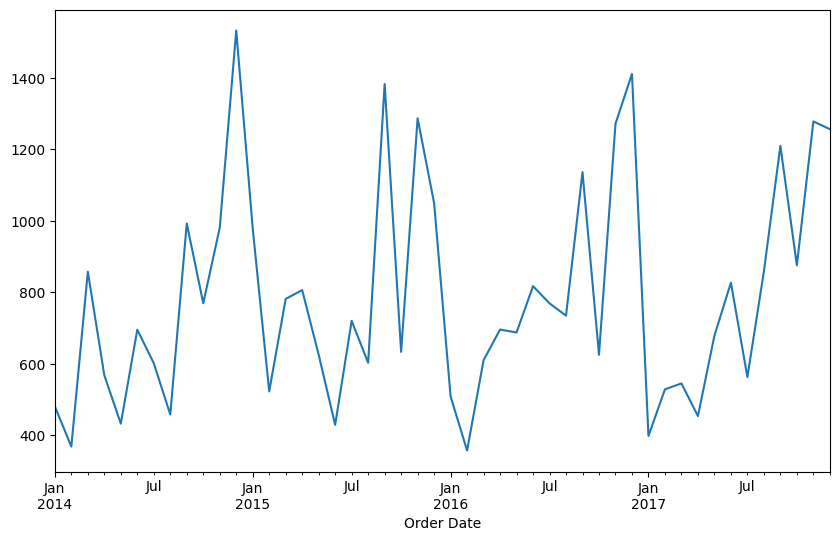

In [21]:
y.plot(figsize = (10,6))
plt.show()

In [22]:
train = y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: ME, Name: Sales, dtype: float64

In [23]:
test= y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: ME, Name: Sales, dtype: float64

<Axes: title={'center': 'Average Sales'}, xlabel='Order Date'>

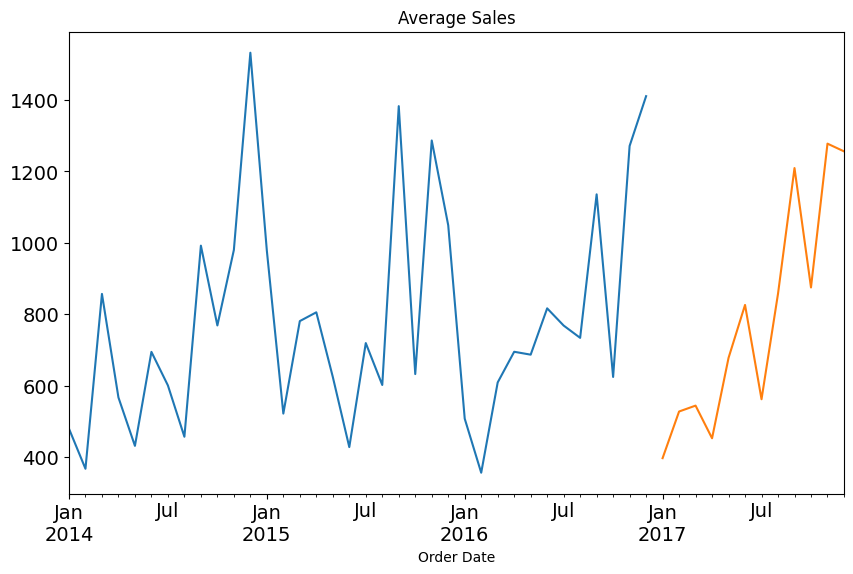

In [24]:
#plotting data
train.plot(figsize = (10,6),title='Average Sales',fontsize = 14)
test.plot(figsize = (10,6),title='Average Sales',fontsize = 14)

Simple Exponential Smoothing Model

In [25]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


d:\anaconda\envs\salesdeploy\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


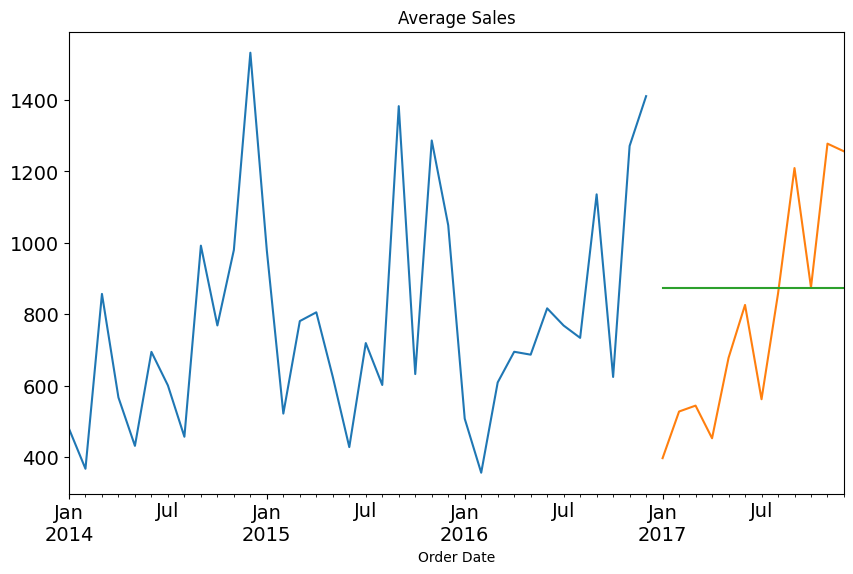

In [26]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()

#smootheing level=alpha
#alpha value should be in range of 0 to 1
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

In [27]:
Exp_Smooth.SES

2017-01-31    873.671829
2017-02-28    873.671829
2017-03-31    873.671829
2017-04-30    873.671829
2017-05-31    873.671829
2017-06-30    873.671829
2017-07-31    873.671829
2017-08-31    873.671829
2017-09-30    873.671829
2017-10-31    873.671829
2017-11-30    873.671829
2017-12-31    873.671829
Freq: ME, dtype: float64

HOLT Model

In [28]:
#RMSE is used to compare different models with with same Algo but different data/parameter
#choose the model with lowest RMSE value

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse =  sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

315.0328571018992


C:\Users\Vaishnavi Adke\AppData\Local\Temp\ipykernel_8584\1184408640.py:9: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope = 0.25)
d:\anaconda\envs\salesdeploy\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


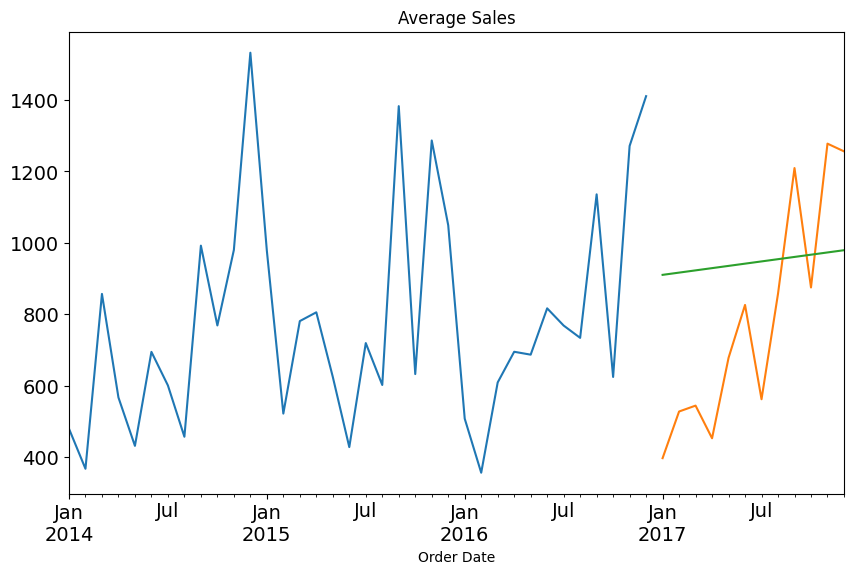

In [29]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

#smootheing level=alpha
#alpha value should be in range of 0 to 1
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope = 0.25)
Holt_df['Holt_linear']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

Simple Exponential Smoothening Model

In [30]:
! pip -m install pmdarima

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
import pmdarima as pm

In [32]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,
                      strat_P=0,max_P=3, D=None, max_D=2, Start_Q=0, max_Q=3,
                      max_order=10,m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.19 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.05 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.24 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.06 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.25 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.68 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.30 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=

In [33]:
model.aic()

489.41762612467426

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train,
               order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

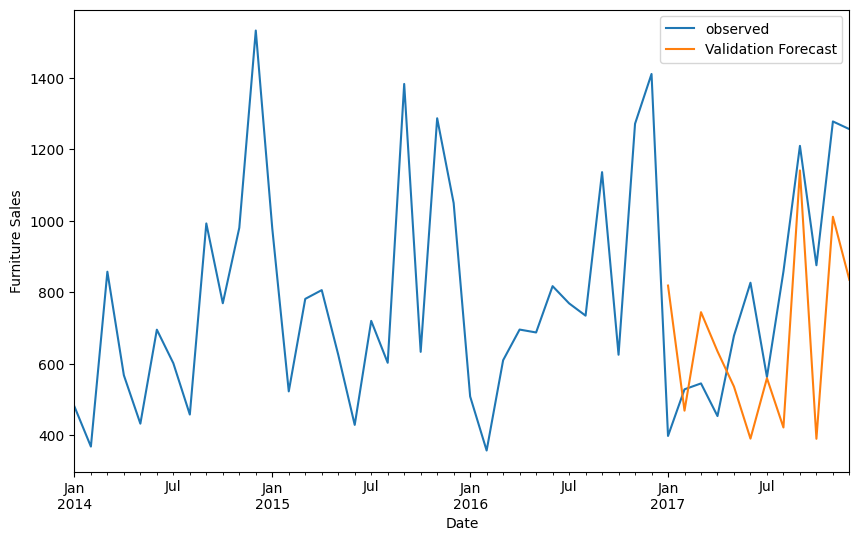

In [35]:
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax= y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()